In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.10.0'

In [4]:
dataset_train = pd.read_csv('apple_share_price.csv')
training_set = dataset_train.iloc[:, :-1].values

In [5]:
training_set

array([['11-Aug-17', 156.6, 158.57, 156.07, 157.48],
       ['10-Aug-17', 159.9, 160.0, 154.63, 155.32],
       ['9-Aug-17', 159.26, 161.27, 159.11, 161.06],
       ...,
       ['5-Jan-11', 47.08, 47.76, 47.07, 47.71],
       ['4-Jan-11', 47.49, 47.5, 46.88, 47.33],
       ['3-Jan-11', 46.52, 47.18, 46.41, 47.08]], dtype=object)

In [6]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,11-Aug-17,156.60,158.57,156.07,157.48,26257096
1,10-Aug-17,159.90,160.00,154.63,155.32,40804273
2,9-Aug-17,159.26,161.27,159.11,161.06,26131530
3,8-Aug-17,158.60,161.83,158.27,160.08,36205896
4,7-Aug-17,157.06,158.92,156.67,158.81,21870321
...,...,...,...,...,...,...
1659,7-Jan-11,47.71,48.05,47.41,48.02,77982212
1660,6-Jan-11,47.82,47.89,47.56,47.68,75106626
1661,5-Jan-11,47.08,47.76,47.07,47.71,63879193
1662,4-Jan-11,47.49,47.50,46.88,47.33,77337001


In [7]:
# get the number of missing data points per column
missing_values_count = dataset_train.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<Axes: >

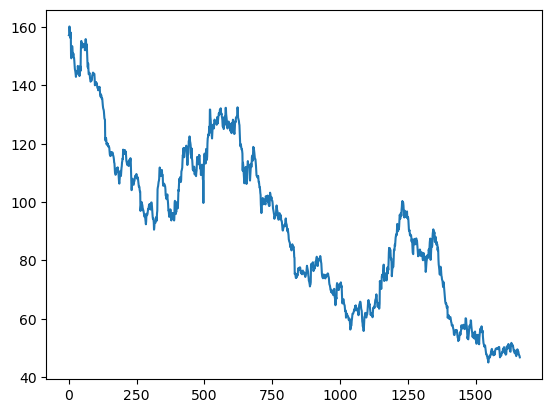

In [8]:
OHLC_avg = dataset_train[[ 'Open', 'High', 'Low','Close']].mean(axis = 1)

OHLC_avg.plot()

In [9]:
OHLC_avg

0       157.1800
1       157.4625
2       160.1750
3       159.6950
4       157.8650
          ...   
1659     47.7975
1660     47.7375
1661     47.4050
1662     47.3000
1663     46.7975
Length: 1664, dtype: float64

In [10]:
len(OHLC_avg)

1664

In [11]:
OHLC_avg= OHLC_avg.values.reshape(len(OHLC_avg),1)

In [12]:
OHLC_avg

array([[157.18  ],
       [157.4625],
       [160.175 ],
       ...,
       [ 47.405 ],
       [ 47.3   ],
       [ 46.7975]])

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
OHLC_avg_scaled = sc.fit_transform(OHLC_avg)

In [14]:
OHLC_avg_scaled

array([[0.97398819],
       [0.97644172],
       [1.        ],
       ...,
       [0.02058364],
       [0.0196717 ],
       [0.01530745]])

In [15]:
from sklearn.model_selection import train_test_split
X_train1, X_test1 = train_test_split(OHLC_avg_scaled ,test_size = 0.25, shuffle=False,random_state=42 )

In [16]:
X_train1

array([[0.97398819],
       [0.97644172],
       [1.        ],
       ...,
       [0.44604395],
       [0.44530571],
       [0.44949627]])

In [17]:
len(X_train1)

1248

In [18]:
len(X_test1)

416

In [19]:
timestamp=10
X_train = []
y_train = []
for i in range((timestamp), 1248):
    X_train.append(X_train1[i-(timestamp):i, 0])
    y_train.append(X_train1[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_test = []
y_test = []
for i in range((timestamp), 416):
    X_test.append(X_test1[i-(timestamp):i, 0])
    y_test.append(X_test1[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [21]:
X_train

array([[0.97398819, 0.97644172, 1.        , ..., 0.98182647, 0.9068091 ,
        0.90531093],
       [0.97644172, 1.        , 0.99583116, ..., 0.9068091 , 0.90531093,
        0.90904551],
       [1.        , 0.99583116, 0.97993747, ..., 0.90531093, 0.90904551,
        0.92378843],
       ...,
       [0.45277488, 0.43470992, 0.43158329, ..., 0.44026837, 0.43340716,
        0.4367292 ],
       [0.43470992, 0.43158329, 0.44283047, ..., 0.43340716, 0.4367292 ,
        0.44604395],
       [0.43158329, 0.44283047, 0.45155897, ..., 0.4367292 , 0.44604395,
        0.44530571]])

In [22]:
print(X_train)

[[0.97398819 0.97644172 1.         ... 0.98182647 0.9068091  0.90531093]
 [0.97644172 1.         0.99583116 ... 0.9068091  0.90531093 0.90904551]
 [1.         0.99583116 0.97993747 ... 0.90531093 0.90904551 0.92378843]
 ...
 [0.45277488 0.43470992 0.43158329 ... 0.44026837 0.43340716 0.4367292 ]
 [0.43470992 0.43158329 0.44283047 ... 0.43340716 0.4367292  0.44604395]
 [0.43158329 0.44283047 0.45155897 ... 0.4367292  0.44604395 0.44530571]]


In [23]:
X_train.shape[0]


1238

In [24]:

X_train.shape[1]

10

In [25]:
y_train.shape

(1238,)

In [26]:
X_test

array([[0.43017196, 0.43388484, 0.42787042, ..., 0.39174049, 0.39436773,
        0.38639917],
       [0.43388484, 0.42787042, 0.43147473, ..., 0.39436773, 0.38639917,
        0.37838718],
       [0.42787042, 0.43147473, 0.42470036, ..., 0.38639917, 0.37838718,
        0.37754039],
       ...,
       [0.02375369, 0.03465347, 0.02477419, ..., 0.03122286, 0.02399253,
        0.02347143],
       [0.03465347, 0.02477419, 0.03916971, ..., 0.02399253, 0.02347143,
        0.02058364],
       [0.02477419, 0.03916971, 0.03732413, ..., 0.02347143, 0.02058364,
        0.0196717 ]])

In [27]:
X_test.shape

(406, 10)

In [28]:
y_test

array([0.37838718, 0.37754039, 0.37819177, 0.38021105, 0.37810492,
       0.37156939, 0.35999653, 0.36638006, 0.36212437, 0.34497134,
       0.32773146, 0.32395345, 0.32236842, 0.35843321, 0.35076863,
       0.36431735, 0.36787824, 0.36099531, 0.36336199, 0.36218951,
       0.35797725, 0.35185426, 0.35810752, 0.36922442, 0.36483846,
       0.36043078, 0.36086503, 0.34966128, 0.33913062, 0.32857825,
       0.3161803 , 0.32169533, 0.31770019, 0.32173875, 0.32810057,
       0.33118378, 0.33593886, 0.33591714, 0.32692809, 0.31895953,
       0.3172008 , 0.32089196, 0.32041428, 0.32788345, 0.32275925,
       0.32128279, 0.3156592 , 0.30640959, 0.30421661, 0.31090412,
       0.32582074, 0.32071826, 0.3168534 , 0.30716953, 0.31576776,
       0.30803804, 0.30769064, 0.28858346, 0.26954143, 0.27668491,
       0.29066788, 0.3004386 , 0.30551937, 0.31314052, 0.31900295,
       0.31227202, 0.31235887, 0.31140351, 0.31789561, 0.33596057,
       0.33233455, 0.33624283, 0.34190985, 0.35789039, 0.36531

In [29]:
y_test.shape

(406,)

In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [31]:
X_train

array([[[0.97398819],
        [0.97644172],
        [1.        ],
        ...,
        [0.98182647],
        [0.9068091 ],
        [0.90531093]],

       [[0.97644172],
        [1.        ],
        [0.99583116],
        ...,
        [0.9068091 ],
        [0.90531093],
        [0.90904551]],

       [[1.        ],
        [0.99583116],
        [0.97993747],
        ...,
        [0.90531093],
        [0.90904551],
        [0.92378843]],

       ...,

       [[0.45277488],
        [0.43470992],
        [0.43158329],
        ...,
        [0.44026837],
        [0.43340716],
        [0.4367292 ]],

       [[0.43470992],
        [0.43158329],
        [0.44283047],
        ...,
        [0.43340716],
        [0.4367292 ],
        [0.44604395]],

       [[0.43158329],
        [0.44283047],
        [0.45155897],
        ...,
        [0.4367292 ],
        [0.44604395],
        [0.44530571]]])

In [32]:
y_train

array([0.90904551, 0.92378843, 0.94159284, ..., 0.44604395, 0.44530571,
       0.44949627])

In [33]:
X_test

array([[[0.43017196],
        [0.43388484],
        [0.42787042],
        ...,
        [0.39174049],
        [0.39436773],
        [0.38639917]],

       [[0.43388484],
        [0.42787042],
        [0.43147473],
        ...,
        [0.39436773],
        [0.38639917],
        [0.37838718]],

       [[0.42787042],
        [0.43147473],
        [0.42470036],
        ...,
        [0.38639917],
        [0.37838718],
        [0.37754039]],

       ...,

       [[0.02375369],
        [0.03465347],
        [0.02477419],
        ...,
        [0.03122286],
        [0.02399253],
        [0.02347143]],

       [[0.03465347],
        [0.02477419],
        [0.03916971],
        ...,
        [0.02399253],
        [0.02347143],
        [0.02058364]],

       [[0.02477419],
        [0.03916971],
        [0.03732413],
        ...,
        [0.02347143],
        [0.02058364],
        [0.0196717 ]]])

In [34]:
y_test

array([0.37838718, 0.37754039, 0.37819177, 0.38021105, 0.37810492,
       0.37156939, 0.35999653, 0.36638006, 0.36212437, 0.34497134,
       0.32773146, 0.32395345, 0.32236842, 0.35843321, 0.35076863,
       0.36431735, 0.36787824, 0.36099531, 0.36336199, 0.36218951,
       0.35797725, 0.35185426, 0.35810752, 0.36922442, 0.36483846,
       0.36043078, 0.36086503, 0.34966128, 0.33913062, 0.32857825,
       0.3161803 , 0.32169533, 0.31770019, 0.32173875, 0.32810057,
       0.33118378, 0.33593886, 0.33591714, 0.32692809, 0.31895953,
       0.3172008 , 0.32089196, 0.32041428, 0.32788345, 0.32275925,
       0.32128279, 0.3156592 , 0.30640959, 0.30421661, 0.31090412,
       0.32582074, 0.32071826, 0.3168534 , 0.30716953, 0.31576776,
       0.30803804, 0.30769064, 0.28858346, 0.26954143, 0.27668491,
       0.29066788, 0.3004386 , 0.30551937, 0.31314052, 0.31900295,
       0.31227202, 0.31235887, 0.31140351, 0.31789561, 0.33596057,
       0.33233455, 0.33624283, 0.34190985, 0.35789039, 0.36531

In [35]:
print(X_train.shape), print(y_train.shape),print(X_test.shape), print(y_test.shape)

(1238, 10, 1)
(1238,)
(406, 10, 1)
(406,)


(None, None, None, None)

In [36]:
X_train.shape[1]
# timestamps=60

10

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [38]:
regressor = Sequential()

In [39]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [40]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [41]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [42]:
regressor.add(Dense(units = 1))

In [43]:
regressor.compile(optimizer = 'RMSProp', loss = 'mean_squared_error')

In [44]:
result=regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 5s 24ms/step - loss: 0.0255
Epoch 2/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0079
Epoch 3/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0070
Epoch 4/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0064
Epoch 5/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0063
Epoch 6/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0051
Epoch 7/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0054
Epoch 8/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0049
Epoch 9/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0045
Epoch 10/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0047
Epoch 11/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0042
Epoch 12/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0044
Epoch 13/100
39/39 [=====

39/39 [==============================] - 1s 25ms/step - loss: 9.5926e-04


In [45]:
trainPredict = regressor.predict(X_train)


39/39 [==============================] - 2s 9ms/step


In [46]:
trainPredict.shape

(1238, 1)

In [47]:
trainPredict

array([[0.90404165],
       [0.89328617],
       [0.8945739 ],
       ...,
       [0.43287978],
       [0.43551448],
       [0.43840247]], dtype=float32)

In [48]:
testPredict = regressor.predict(X_test)

13/13 [==============================] - 0s 10ms/step


In [49]:
testPredict.shape

(406, 1)

In [50]:
testPredict

array([[0.38801074],
       [0.3826731 ],
       [0.37848917],
       [0.37647024],
       [0.37654823],
       [0.3764727 ],
       [0.37403017],
       [0.36769143],
       [0.364654  ],
       [0.36245462],
       [0.35527682],
       [0.34310013],
       [0.3324973 ],
       [0.32585138],
       [0.33535135],
       [0.3440569 ],
       [0.3534479 ],
       [0.36093965],
       [0.3626286 ],
       [0.3626813 ],
       [0.36196288],
       [0.3598456 ],
       [0.35594454],
       [0.35509112],
       [0.35948178],
       [0.3623782 ],
       [0.36200714],
       [0.36089954],
       [0.35617882],
       [0.34835723],
       [0.33881873],
       [0.32799482],
       [0.32255888],
       [0.3195863 ],
       [0.319692  ],
       [0.32291585],
       [0.32698315],
       [0.33138865],
       [0.3342746 ],
       [0.33248904],
       [0.32710505],
       [0.32201847],
       [0.32025322],
       [0.3200741 ],
       [0.3229478 ],
       [0.32399234],
       [0.32342017],
       [0.320

In [51]:
train_predict=sc.inverse_transform(trainPredict)
y_train=sc.inverse_transform([y_train])
test_predict=sc.inverse_transform(testPredict)
y_test=sc.inverse_transform([y_test])

In [54]:
y_test.shape

(1, 406)

In [55]:
y_test=y_test.reshape(-1,1)

In [56]:
X_test.shape

(406, 10, 1)

In [57]:
y_test


array([[88.6025],
       [88.505 ],
       [88.58  ],
       [88.8125],
       [88.57  ],
       [87.8175],
       [86.485 ],
       [87.22  ],
       [86.73  ],
       [84.755 ],
       [82.77  ],
       [82.335 ],
       [82.1525],
       [86.305 ],
       [85.4225],
       [86.9825],
       [87.3925],
       [86.6   ],
       [86.8725],
       [86.7375],
       [86.2525],
       [85.5475],
       [86.2675],
       [87.5475],
       [87.0425],
       [86.535 ],
       [86.585 ],
       [85.295 ],
       [84.0825],
       [82.8675],
       [81.44  ],
       [82.075 ],
       [81.615 ],
       [82.08  ],
       [82.8125],
       [83.1675],
       [83.715 ],
       [83.7125],
       [82.6775],
       [81.76  ],
       [81.5575],
       [81.9825],
       [81.9275],
       [82.7875],
       [82.1975],
       [82.0275],
       [81.38  ],
       [80.315 ],
       [80.0625],
       [80.8325],
       [82.55  ],
       [81.9625],
       [81.5175],
       [80.4025],
       [81.3925],
       [80

In [58]:
X_test.shape

(406, 10, 1)

In [59]:
train_predict.shape

(1238, 1)

In [60]:
test_predict.shape

(406, 1)

In [61]:
test_predict

array([[89.710556],
       [89.095985],
       [88.61424 ],
       [88.38179 ],
       [88.39076 ],
       [88.382065],
       [88.10084 ],
       [87.370995],
       [87.02126 ],
       [86.76803 ],
       [85.941574],
       [84.53955 ],
       [83.31874 ],
       [82.55353 ],
       [83.647354],
       [84.64971 ],
       [85.730995],
       [86.5936  ],
       [86.78806 ],
       [86.79413 ],
       [86.71141 ],
       [86.46763 ],
       [86.018456],
       [85.9202  ],
       [86.425735],
       [86.75923 ],
       [86.7165  ],
       [86.588974],
       [86.04543 ],
       [85.14485 ],
       [84.046585],
       [82.80032 ],
       [82.17443 ],
       [81.83217 ],
       [81.84434 ],
       [82.21553 ],
       [82.68384 ],
       [83.191086],
       [83.52338 ],
       [83.317795],
       [82.697876],
       [82.11221 ],
       [81.90896 ],
       [81.888336],
       [82.21921 ],
       [82.339485],
       [82.2736  ],
       [81.95441 ],
       [81.306114],
       [80.701935],


In [62]:
y_train=y_train.reshape(-1,1)

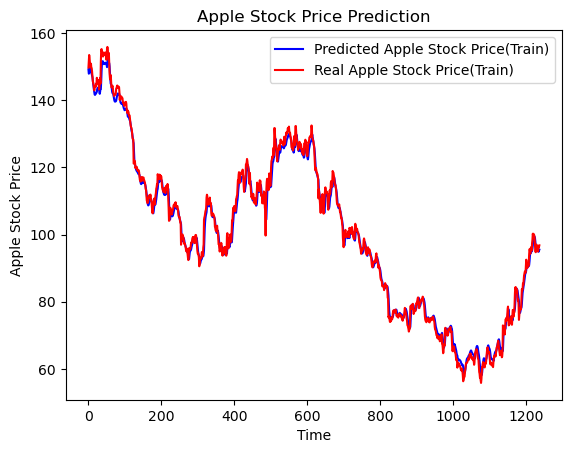

In [63]:

plt.plot(train_predict, color = 'BLUE', label = 'Predicted Apple Stock Price(Train)')
plt.plot(y_train, color = 'red', label = 'Real Apple Stock Price(Train)')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

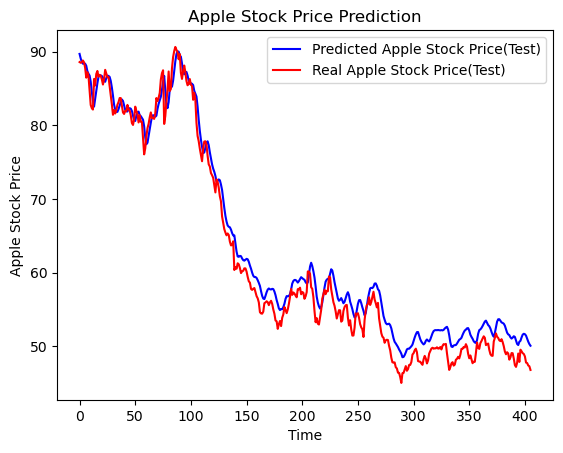

In [64]:
plt.plot(test_predict, color = 'blue', label = 'Predicted Apple Stock Price(Test)')
plt.plot(y_test, color = 'red', label = 'Real Apple Stock Price(Test)')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

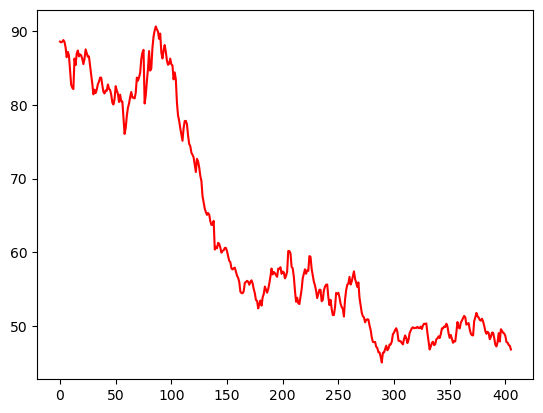

In [65]:
plt.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
plt.show()

In [66]:
testPredict.shape

(406, 1)

In [67]:
import math
from sklearn.metrics import mean_squared_error

In [68]:
RMSE = math.sqrt(mean_squared_error(y_train,train_predict))
print('Train RMSE: %.2f' % (RMSE))

RMSE = math.sqrt(mean_squared_error(y_test,test_predict))
print('Test RMSE: %.2f' % (RMSE))

Train RMSE: 1.97
Test RMSE: 2.27


In [69]:
from sklearn.metrics import mean_absolute_error
MAE = math.sqrt(mean_absolute_error(y_train,train_predict))
print('Train MAE: %.2f' % (MAE))

Train MAE: 1.21


In [70]:
from sklearn.metrics import mean_absolute_error
MAE = math.sqrt(mean_absolute_error(y_test,test_predict))
print('Test MAE: %.2f' % (MAE))

Test MAE: 1.41


In [71]:
pip install jupyterthemes

     ---------------------------------------- 7.0/7.0 MB 12.5 MB/s eta 0:00:00
     ---------------------------------------- 46.7/46.7 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [73]:
jupyterthemes -l

NameError: name 'jupyterthemes' is not defined